### Full screen

In [125]:
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Packages

In [126]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


### References 
Chapter 2 *Kinematics* --> Section 2.3 *Application: air flow over a plane wing*<br>
### Model
We found the velocity potential (in cylindrical coordinates):
$$
\Phi (r,\theta) = -U \left(r+\frac{R^2}{r}\right)\cos\theta
$$
from which we deduced the components of the velocity field:
$$
v_r(r,\theta)=-U\left(1-\frac{R^2}{r^2}\right)\cos\theta
$$
$$
v_{\theta}(r,\theta)=U\left(1+\frac{R^2}{r^2}\right)\sin\theta
$$
$$
v_z=0
$$
We use $R$ and $U$ as length and velocity scale to obtain the dimensionless expression of the velocity:
$$
v_r=-\left(1-\frac{1}{r^2}\right)\cos\theta
$$
$$
v_{\theta}=\left(1+\frac{1}{r^2}\right)\sin\theta
$$
where $r$ is in units of $R$ and $v_r$ and $v_{\theta}$ are in units of $U$.

In [90]:
def cart_to_pol(x,y):
    r = np.sqrt(x**2+y**2)
    th = np.arctan2(y,x)
    return r,th

In [91]:
def get_v(r,th):
    tmp = - (1-1/r**2)*np.cos(th)
    vr = np.where(r>1,tmp,0)
    tmp = (1+1/r**2)*np.sin(th)
    vt = np.where(r>1,tmp,0)  
    return vr, vt

In [92]:
def vec_pol_to_cart(th,vr,vt):
    vx = vr*np.cos(th) - vt*np.sin(th)
    vy = vr*np.sin(th) + vt*np.cos(th)    
    return vx,vy

In [118]:
def plt_disk(ax,x,y,r,clr):
    disk = plt.Circle((x,y),r,color=clr)
    ax.add_patch(disk)
    return 

### Numeric parameters

In [122]:
x_mx=4.
x_mn=-x_mx
y_mx=2.
y_mn=-y_mx

# grid resolution
Nx=1000 
Ny=Nx*(y_mx-y_mn)/(x_mx-x_mn) # to have \Delta x = \Delta y

Nc=20 # number of contours for colormap

In [123]:
Y,X = np.mgrid[y_mn:y_mx:(Ny*1j),x_mn:x_mx:(Nx*1j)] # we make the mesh (i.e. the grid) w/ all the (x,y) points
r,th = cart_to_pol(X,Y) # for each point, we find the corresponding polar coordinates
vr, vt = get_v(r,th) # we use the aforementioned expression of the velocity components
vx, vy = vec_pol_to_cart(th,vr,vt) # we convert the velocity components from cylindrical to Cartesian coordinates

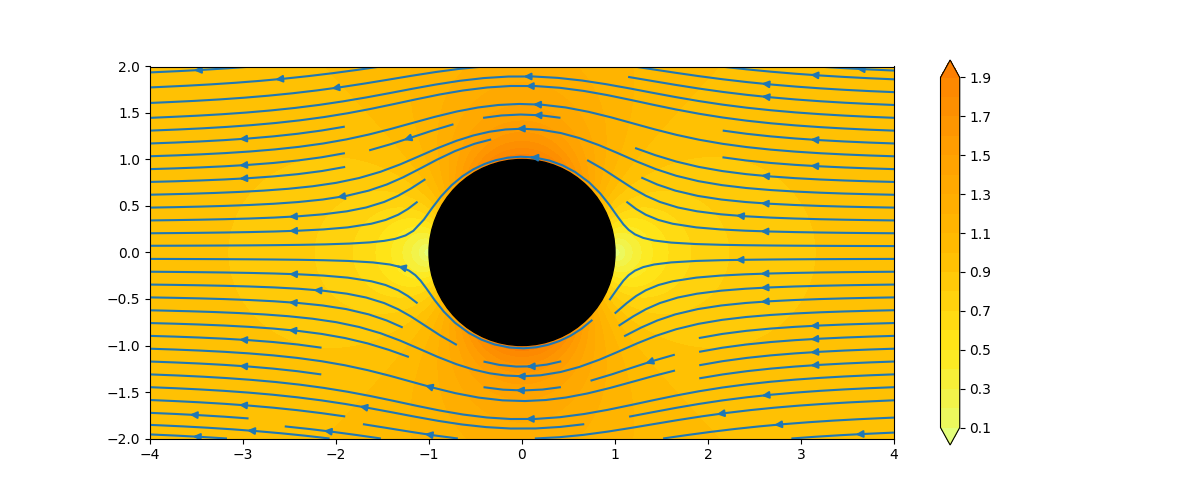

In [124]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
ax.streamplot(X,Y, vx, vy)
Z=np.sqrt(vr**2+vt**2)
contour=ax.contourf(X,Y,Z,levels=20,extend='both',cmap='Wistia',vmin=0,vmax=2)
cbar = plt.colorbar(contour)
plt_disk(ax,0,0,1,'k')
# ax.grid()
plt.show()